In [91]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## The Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [92]:
data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [93]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#### Input variables

1 - age 年齡(numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [94]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [95]:
data['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [96]:
# data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
# data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
# data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
data['education'].replace({'basic.9y':'Basic', 'basic.6y':'Basic', 'basic.4y':'Basic'}, inplace=True)


After grouping, this is the columns.

In [97]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data exploration

In [98]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [99]:
36548 / (36548+4640)

0.8873458288821987

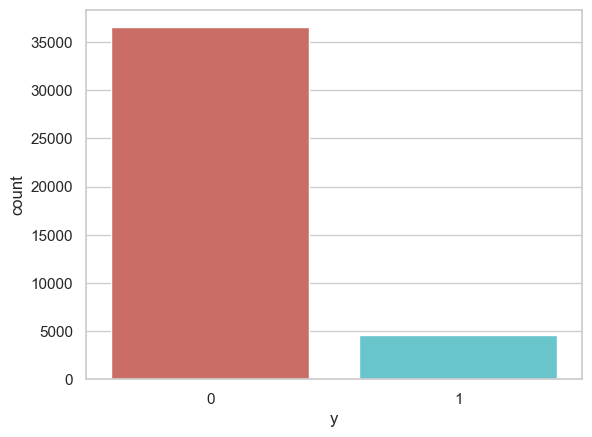

In [100]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [101]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, Let's do some more exploration.

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [103]:
col_list = [x for x in data.columns if data[f'{x}'].dtype != object]
data.groupby('y')[col_list].mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
y,,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.0
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,1.0


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [104]:
data.groupby('job')[col_list].mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [105]:
data.groupby('marital')[col_list].mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [106]:
data.groupby('education')[col_list].mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Visualizations

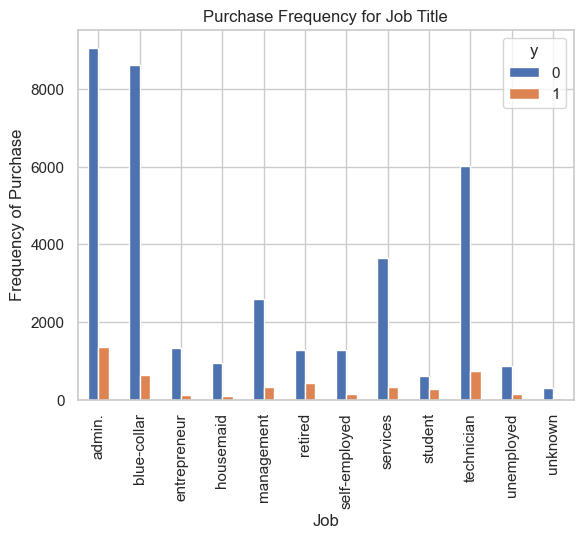

In [107]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase');

In [108]:
pd.crosstab(data.job,columns=[data.month, data.y])

month          apr        aug      dec       jul        jun      mar      \
y                0    1     0    1   0   1     0    1     0    1   0   1   
job                                                                        
admin.         469  175  1826  213  28  22  1623  192  1080  158  80  89   
blue-collar    512   53   534   48   7   5  1669  120  1289   96  23  27   
entrepreneur    94   15    61   13   0   1   256   17   198   19   1   1   
housemaid       28   19   193   15   5   5   226   13   125   11   2   4   
management     165   30   317   40   7   5   359   40   309   43  25  17   
retired         93   67   262   80  16  17   220   51   146   27  33  31   
self-employed   75   22   196   16   2   4   199   21   182   22  13  12   
services       249   32   249   31   0   2   719   71   508   34  15  10   
student         69   35    72   44  14   6    83   22    68   33  16  25   
technician     295   73  1653  134   8  16   974   82   655   83  53  49   
unemployed      37   16   105   16   5   5   152   13   147   23   7  11   
unknown          7    2    55    5   1   1    45    7    52   10   2   0   

month           may       nov       oct     sep      
y                 0    1    0    1    0   1   0   1  
job                                                  
admin.         2808  211  965  120  109  88  82  84  
blue-collar    3974  225  560   42   35  16  13   6  
entrepreneur    452   32  254   15   10   5   6   6  
housemaid       282   14   74   13   11   8   8   4  
management      856   53  508   53   25  26  25  21  
retired         299   30   89   47   76  50  52  34  
self-employed   394   24  184   14   15   6  12   8  
services       1565  101  306   15   16  17  19  10  
student         189   43   36   18   26  27  27  22  
technician     1706  127  563   64   58  58  48  44  
unemployed      241   23  142   12   17  11  17  14  
unknown         117    3    4    3    5   3   5   3

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

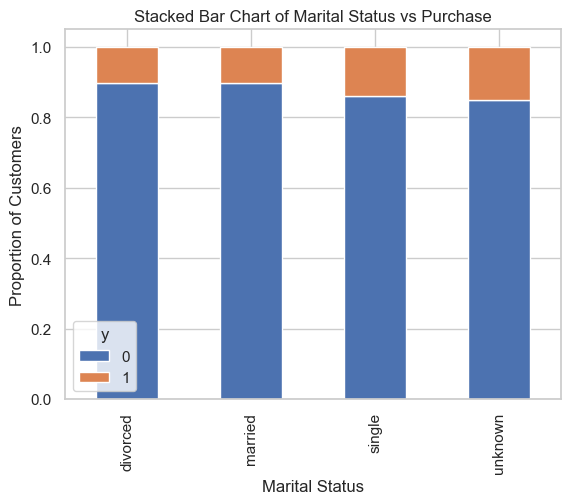

In [109]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers');

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

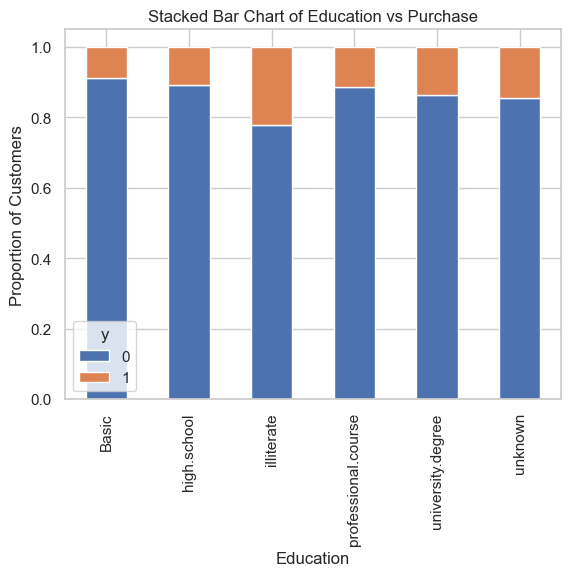

In [110]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers');

Education seems a good predictor of the outcome variable.

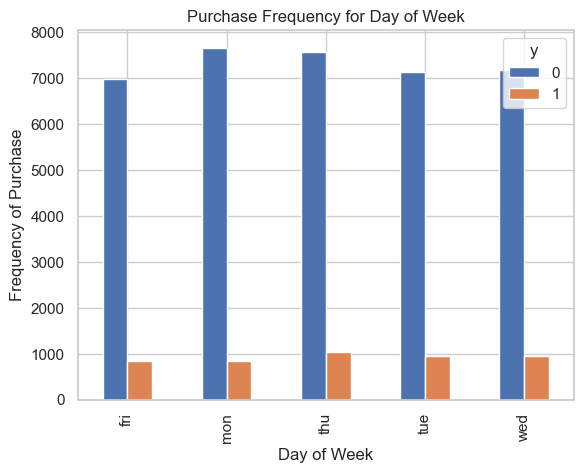

In [111]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase');

Day of week may not be a good predictor of the outcome.

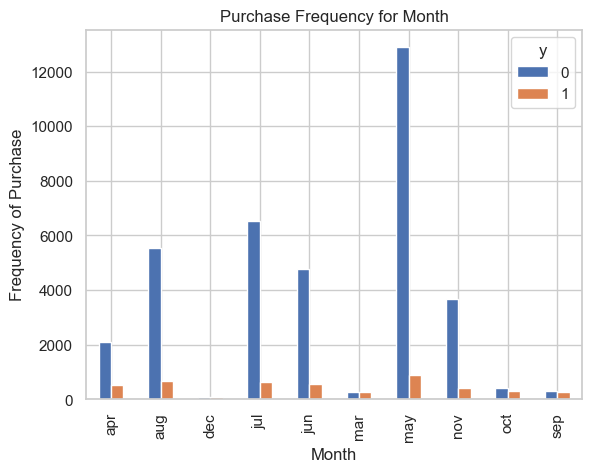

In [112]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase');

Month might be a good predictor of the outcome variable.

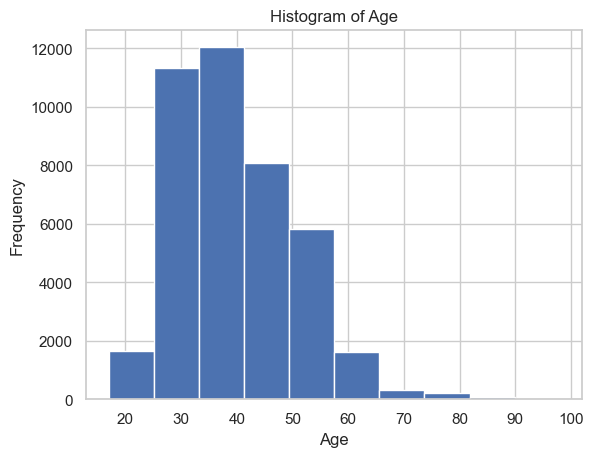

In [113]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency');

Most customers of the bank in this dataset are in the age range of 30-40.

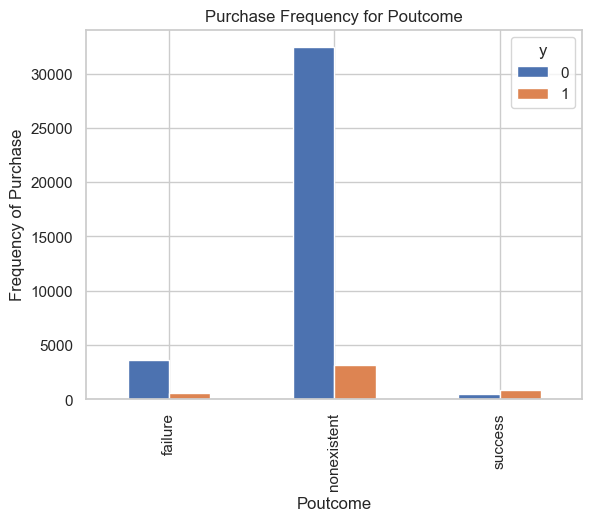

In [114]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase');

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [115]:
cat_vars = [x for x in data.columns if data[x].dtype == 'object']
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
# cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
# cat_vars = [x for x in data.columns if data[x].dtype == 'object']
# data_vars=data.columns.values.tolist()
# to_keep=[i for i in data_vars if i not in cat_vars]
# data_final=data[to_keep]
data_final = data.drop(cat_vars, axis=1)
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [116]:
len(data_final.columns)

62

In [117]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  bool   
 12  job_blue-collar                41188 non-null 

In [118]:
for x in data_final.columns:
    if data_final[x].dtype == 'bool':    
        data_final[x] = data_final[x].astype('int')


### Over-sampling using SMOTE

In [119]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [120]:
y['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

### SMOTE 資料增補

In [121]:
from imblearn.over_sampling import SMOTE
import imblearn

# imblearn 0.6 above, 要加這一行
# 參考 https://stackoverflow.com/questions/59453238/attributeerror-dataframe-object-has-no-attribute-name-when-using-smote
print(imblearn.__version__)
if int(imblearn.__version__[2])>=6:
    print('fix bug for imblearn 0.6.0 above')
    y = data_final.loc[:, 'y']


os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

0.11.0
length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [122]:
len(os_data_y[os_data_y['y']==0]), len(os_data_y[os_data_y['y']==1])

(25567, 25567)

### Recursive feature elimination

In [123]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X = data_final_vars.remove('y')

In [124]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False False False False False
 False False False False False  True  True  True  True  True False  True
 False]
[35 30 29 32 28 25 26 33 23 31 20 13 14 16 19 34 18 15 24 17 22 21  1  1
  1  1  1  1 36  1  1  1  1  1 37  1  1  1  1  1  1  1  1  7  4  9  5  8
 12  6  3 11 10  1  1  1  1  1  2  1 27]


The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [125]:
cols = os_data_X.columns[rfe.support_].to_list()
X=os_data_X[os_data_X.columns[rfe.support_]]
y=os_data_y['y']

### Implementing the model

In [126]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.332945
         Iterations 8
                                        Results: Logit
Model:                        Logit                      Method:                     MLE       
Dependent Variable:           y                          Pseudo R-squared:           0.520     
Date:                         2023-10-04 16:41           AIC:                        34097.6491
No. Observations:             51134                      BIC:                        34309.8620
Df Model:                     23                         Log-Likelihood:             -17025.   
Df Residuals:                 51110                      LL-Null:                    -35443.   
Converged:                    1.0000                     LLR p-value:                0.0000    
No. Iterations:               8.0000                     Scale:                      1.0000    
---------------------------------------------------------------------------

The p-values for four variables are very high, therefore, we will remove them.

In [127]:
cols.remove('marital_unknown')
cols.remove('housing_unknown')
cols.remove('loan_unknown')
X=os_data_X[cols]
y=os_data_y['y']

In [128]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.333010
         Iterations 8
                                Results: Logit
Model:                   Logit                Method:               MLE       
Dependent Variable:      y                    Pseudo R-squared:     0.520     
Date:                    2023-10-04 16:41     AIC:                  34100.2576
No. Observations:        51134                BIC:                  34294.7861
Df Model:                21                   Log-Likelihood:       -17028.   
Df Residuals:            51112                LL-Null:              -35443.   
Converged:               1.0000               LLR p-value:          0.0000    
No. Iterations:          8.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

### Logistic Regression Model Fitting

資料分割

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [130]:
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(acc_log))

Accuracy of logistic regression classifier on test set: 92.79%


### Confusion Matrix

In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7635   31]
 [1078 6597]]


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      7666
           1       1.00      0.86      0.92      7675

    accuracy                           0.93     15341
   macro avg       0.94      0.93      0.93     15341
weighted avg       0.94      0.93      0.93     15341



#### Interpretation:

Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer's preferred term deposit were promoted.

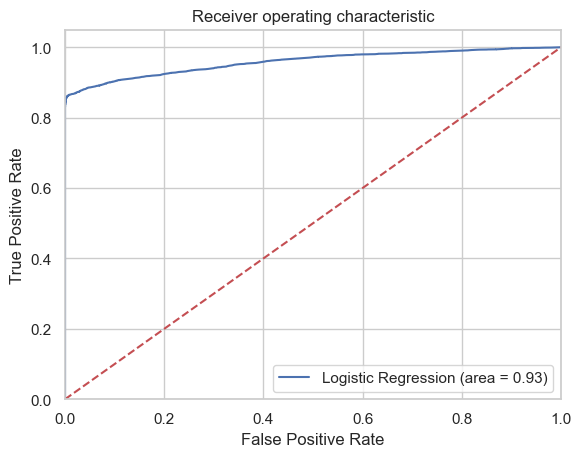

In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## SVM 模型評估

In [134]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# clf = SVC(probability=True)
clf = SVC()
clf.fit(X_train, y_train)
# 計算準確率
y_pred = clf.predict(X_test)
acc_svm = round(accuracy_score(y_pred, y_test) * 100, 2)
print(f'{acc_svm}%') 

92.97%


## 決策樹 模型評估

In [135]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# 計算準確率
y_pred = clf.predict(X_test)
# acc_decision = round(clf.score(X_train, y_train) * 100, 2)
acc_decision = round(accuracy_score(y_pred, y_test) * 100, 2)
print(f'{acc_decision}%') 

92.66%


## 隨機森林 模型評估

In [136]:
# 隨機森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5,min_samples_split = 20,n_estimators=100, random_state=42)
# rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# 計算準確率
y_pred = clf.predict(X_test)
# acc_random = round(clf.score(X_train, y_train) * 100, 2)
acc_random = round(accuracy_score(y_pred, y_test) * 100, 2)
print(f'{acc_random}%') 

92.66%


## KNN 模型評估

In [137]:
# K鄰近法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_prd = knn.predict(X_test)
# acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(f'{acc_knn}%') 

92.66%


## 樸素貝葉斯 模型評估

In [138]:
# 樸素貝葉斯
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_prd = gaussian.predict(X_test)
# acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(f'{acc_gaussian}%') 

92.66%


## 模型評分比較

In [139]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM', 'KNN', 'Naive Bayes','Decision Tree', 'Random Forest'],
    'Score': [acc_log,  acc_svm, acc_knn, acc_gaussian, acc_decision, acc_random]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,SVM,92.97
0,Logistic Regression,92.79
2,KNN,92.66
3,Naive Bayes,92.66
4,Decision Tree,92.66
5,Random Forest,92.66
